In [ ]:
import shutil
import os

source_dir = "/content/drive/MyDrive/wood_otsu/wood"
destination_dir = "/content/fast_flow_dataset/wood"

# Harita: kaynak klasör ismini hedef klasör ismine dönüştürüyoruz
subdir_map = {
    "train": "train",
    "test": "test",
    "ground_truth": "ground"
}

for subdir, dest_subdir in subdir_map.items():
    source_path = os.path.join(source_dir, subdir)
    dest_path = os.path.join(destination_dir, dest_subdir)

    if os.path.exists(dest_path):
        shutil.rmtree(dest_path)  # var olan klasörü sil, yeniden kopyala
    shutil.copytree(source_path, dest_path)
    print(f"✔️ Kopyalandı: {source_path} → {dest_path}")

✔️ Kopyalandı: /content/drive/MyDrive/wood_otsu/wood/train → /content/fast_flow_dataset/wood/train
✔️ Kopyalandı: /content/drive/MyDrive/wood_otsu/wood/test → /content/fast_flow_dataset/wood/test
✔️ Kopyalandı: /content/drive/MyDrive/wood_otsu/wood/ground_truth → /content/fast_flow_dataset/wood/ground


In [ ]:
from PIL import Image
import os
import shutil
from glob import glob

def resize_and_copy_images(src_folder, dst_folder, size=(256, 256)):
    os.makedirs(dst_folder, exist_ok=True)
    image_paths = glob(os.path.join(src_folder, "*.jpg"))
    for src_path in image_paths:
        try:
            img = Image.open(src_path).convert("RGB" if "mask" not in src_path else "L")
            img = img.resize(size)

            relative_path = os.path.relpath(src_path, start=base_src)
            dst_path = os.path.join(base_dst, relative_path)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            img.save(dst_path)

            print(f"✅ {dst_path}")
        except Exception as e:
            print(f"❌ Hata oluştu ({src_path}): {e}")

# 📁 Ana klasör yolları
base_src = "/content/fast_flow_dataset/wood"
base_dst = "/content/fast_flow_dataset/wood"

# 📂 Alt klasörleri işleme
subfolders = [
    "train/good",
    "test/defect",
    "ground/defect"
]

for sub in subfolders:
    resize_and_copy_images(os.path.join(base_src, sub), os.path.join(base_dst, sub), size=(256, 256))


✅ /content/fast_flow_dataset/wood/train/good/36.jpg
✅ /content/fast_flow_dataset/wood/train/good/63.jpg
✅ /content/fast_flow_dataset/wood/train/good/3.jpg
✅ /content/fast_flow_dataset/wood/train/good/23.jpg
✅ /content/fast_flow_dataset/wood/train/good/16.jpg
✅ /content/fast_flow_dataset/wood/train/good/45.jpg
✅ /content/fast_flow_dataset/wood/train/good/21.jpg
✅ /content/fast_flow_dataset/wood/train/good/13.jpg
✅ /content/fast_flow_dataset/wood/train/good/10.jpg
✅ /content/fast_flow_dataset/wood/train/good/29.jpg
✅ /content/fast_flow_dataset/wood/train/good/70.jpg
✅ /content/fast_flow_dataset/wood/train/good/33.jpg
✅ /content/fast_flow_dataset/wood/train/good/28.jpg
✅ /content/fast_flow_dataset/wood/train/good/7.jpg
✅ /content/fast_flow_dataset/wood/train/good/57.jpg
✅ /content/fast_flow_dataset/wood/train/good/64.jpg
✅ /content/fast_flow_dataset/wood/train/good/59.jpg
✅ /content/fast_flow_dataset/wood/train/good/2.jpg
✅ /content/fast_flow_dataset/wood/train/good/38.jpg
✅ /content/fast

In [ ]:
import os
from glob import glob

def rename_and_sort_files(directory, extension):
    files = sorted(glob(os.path.join(directory, f"*.{extension}")))
    for idx, file in enumerate(files, start=1):
        new_file = os.path.join(directory, f"{str(idx).zfill(3)}.{extension}")
        os.rename(file, new_file)
        print(f"'{file}' ➡️ '{new_file}'")

# Maskeler için yeniden adlandırma:
rename_and_sort_files("/content/fast_flow_dataset/wood/ground/defect", "jpg")

# Test görüntüleri için yeniden adlandırma:
rename_and_sort_files("/content/fast_flow_dataset/wood/test/defect", "jpg")

'/content/fast_flow_dataset/wood/ground/defect/100000000_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/001.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000003_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/002.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000006_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/003.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000007_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/004.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000008_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/005.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000009_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/006.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000012_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/007.jpg'
'/content/fast_flow_dataset/wood/ground/defect/100000014_mask.jpg' ➡️ '/content/fast_flow_dataset/wood/ground/defect/0

In [ ]:
!git clone https://github.com/gathierry/FastFlow.git

Cloning into 'FastFlow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 51 (delta 8), reused 7 (delta 5), pack-reused 31 (from 1)
Receiving objects: 100% (51/51), 17.97 KiB | 17.97 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
!pip install pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.2/343.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [ ]:
!pip install -r /content/FastFlow/requirements.txt


  Cloning https://github.com/VLL-HD/FrEIA (to revision 1779d1fba1e21000fda1927b59eeac0a6fcaa284) to /tmp/pip-install-hs1nslsu/freia_2973f379bc74435d84c68bcd6cd0ac41
  Running command git clone --filter=blob:none --quiet https://github.com/VLL-HD/FrEIA /tmp/pip-install-hs1nslsu/freia_2973f379bc74435d84c68bcd6cd0ac41
  Running command git rev-parse -q --verify 'sha^1779d1fba1e21000fda1927b59eeac0a6fcaa284'
  Running command git fetch -q https://github.com/VLL-HD/FrEIA 1779d1fba1e21000fda1927b59eeac0a6fcaa284
  Running command git checkout -q 1779d1fba1e21000fda1927b59eeac0a6fcaa284
  Resolved https://github.com/VLL-HD/FrEIA to commit 1779d1fba1e21000fda1927b59eeac0a6fcaa284
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement torch==1.9.1 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0)
ERROR: No matching distribution found for torch==1.9.1


In [ ]:
!pip install git+https://github.com/VLL-HD/FrEIA.git

  Cloning https://github.com/VLL-HD/FrEIA.git to /tmp/pip-req-build-x8wy1spt
  Running command git clone --filter=blob:none --quiet https://github.com/VLL-HD/FrEIA.git /tmp/pip-req-build-x8wy1spt
  Resolved https://github.com/VLL-HD/FrEIA.git to commit 421249652c478b3f240f124f69eb5777b6a76bf2
  Preparing metadata (setup.py) ... done
  Created wheel for FrEIA: filename=FrEIA-0.2-py3-none-any.whl size=71093 sha256=58d84f3c48ef16a9ab2f38e851868eec8e07e36476e16db8ed3fadc65f87222c
  Stored in directory: /tmp/pip-ephem-wheel-cache-ki_5suih/wheels/5d/bc/5e/98e57265be637a3cd947dbf456ffe367944b3c645bb665d6f6
Successfully built FrEIA


In [50]:
!python /content/FastFlow/main.py \
  -cfg /content/FastFlow/configs/wide_resnet50_2.yaml \
  --data /content/fast_flow_dataset \
  -cat wood

Model A.D. Param#: 45007872
[TRAIN] Eğitim verisi bulundu: 70 dosya
[TEST] Test verisi bulundu: 140 dosya
[TEST] Örnek dosya: /content/fast_flow_dataset/wood/test/good/79.jpg
Epoch 1 - Step 2: loss = 525988.438(726012.969)
Epoch 2 - Step 2: loss = 58679.148(2825637.324)
Epoch 3 - Step 2: loss = -145393.719(-105608.969)
Epoch 4 - Step 2: loss = -339513.125(-266983.586)
Epoch 5 - Step 2: loss = -465249.000(-405497.000)
Epoch 6 - Step 2: loss = -547503.188(-531609.984)
Epoch 7 - Step 2: loss = -686209.250(-667341.906)
Epoch 8 - Step 2: loss = -802041.375(-764876.469)
Epoch 9 - Step 2: loss = -877025.812(-870460.438)
Epoch 10 - Step 2: loss = -972459.875(-957200.969)
🧪 Test loader uzunluğu: 5
📊 Anomaly skor aralığı: min = 0.0 max = 0.9999999
📊 Anomali içeren test görseli sayısı: 57
✅ AUROC (image-level): 0.5340
✅ F1 Score (image-level, t=0.4850): 0.6000
✅ IoU (image-level, t=0.4850): 0.4286
📁 CSV kaydedildi: /content/FastFlow/eval_results.csv
Epoch 11 - Step 2: loss = -1040169.438(-1030264

In [49]:
!rm -rf /content/FastFlow/_fastflow_experiment_checkpoints

# Değerlendirme

In [ ]:
import torch
from main import build_model
import yaml

# YOL TANIMLARI
checkpoint_path = "/content/_fastflow_experiment_checkpoints/exp20/499.pt"
config_path = "/content/FastFlow/configs/resnet18.yaml"

# CONFIG YÜKLE
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

# MODEL YÜKLE
model = build_model(config)
checkpoint = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint["model_state_dict"])
model.cuda()
model.eval()


Model A.D. Param#: 24403456


FastFlow(
  (feature_extractor): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNo

# Şu anlık gerek yok

In [ ]:
from PIL import Image
from torchvision import transforms
import numpy as np

# BİR TEST GÖRSELİ SEÇ
image_path = "/content/fast_flow_dataset/wood/test/defect/013.jpg"

# AYNEN TRAINDEKİ GİBİ DÖNÜŞÜMLER
input_size = config["input_size"]
image_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# GÖRSELİ TENSOR'A ÇEVİR
img = Image.open(image_path).convert("RGB")
img_tensor = image_transform(img).unsqueeze(0).cuda()

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
from skimage.filters import threshold_otsu
from tqdm import tqdm

# 📁 Klasör yolları
test_defect_dir = "/content/fast_flow_dataset/wood/test/defect"
result_dir = "/content/result"
os.makedirs(result_dir, exist_ok=True)

# 🔧 Görsel transform
input_size = config["input_size"]
image_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 🔄 Tüm görselleri sırala
image_files = sorted([f for f in os.listdir(test_defect_dir) if f.endswith((".jpg", ".png"))])

# 🎯 Her görsel için işlem yap
for file_name in tqdm(image_files):
    image_path = os.path.join(test_defect_dir, file_name)

    # Görseli oku ve dönüştür
    img = Image.open(image_path).convert("RGB")
    img_tensor = image_transform(img).unsqueeze(0).cuda()

    # FORWARD PASS
    with torch.no_grad():
        output = model(img_tensor)
        anomaly_map = output["anomaly_map"]

    # Boyut eşitle
    anomaly_map_resized = F.interpolate(anomaly_map, size=input_size, mode="bilinear", align_corners=False)
    anomaly_map_resized = anomaly_map_resized.squeeze().cpu().numpy()

    # Otsu threshold ile binary mask
    otsu_thresh = threshold_otsu(anomaly_map_resized)
    pred_mask = (anomaly_map_resized > otsu_thresh).astype(np.uint8)

    # Anomaly score = max değeri
    anomaly_score = anomaly_map_resized.max()

    # GÖRSELLEŞTİR ve KAYDET
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(img)
    axes[0].set_title("Original")

    axes[1].imshow(anomaly_map_resized, cmap='hot')
    axes[1].set_title(f"Anomaly Map\nScore: {anomaly_score:.4f}")

    axes[2].imshow(pred_mask, cmap='gray')
    axes[2].set_title(f"Predicted Mask\nOtsu: {otsu_thresh:.4f}")

    for ax in axes:
        ax.axis("off")

    plt.tight_layout()
    save_path = os.path.join(result_dir, f"result_{os.path.splitext(file_name)[0]}.png")
    plt.savefig(save_path)
    plt.close()

print("✅ Tüm sonuçlar '/content/result' klasörüne kaydedildi.")


100%|██████████| 70/70 [00:24<00:00,  2.92it/s]

✅ Tüm sonuçlar '/content/result' klasörüne kaydedildi.


# Çalıştır

🔍 Tüm anomaly map değerleri toplanıyor...


Anomaly map toplanıyor: 100%|██████████| 140/140 [00:06<00:00, 22.91it/s]



🌐 Global Otsu Threshold: -0.3212

📤 Tahmin maskeleri üretiliyor ve kaydediliyor...


Mask kaydı:  77%|███████▋  | 108/140 [00:37<00:11,  2.86it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



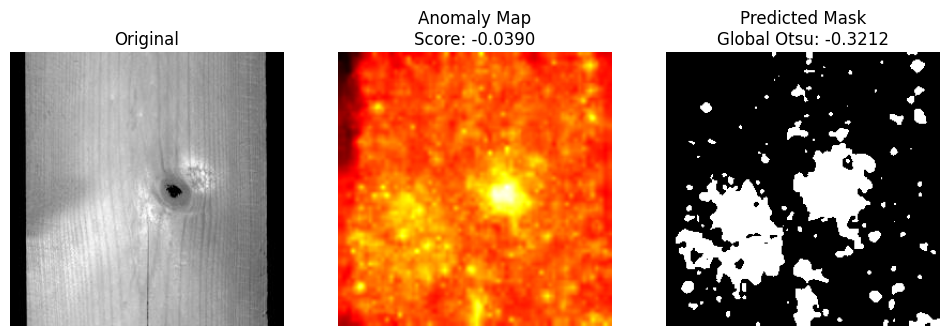

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
from skimage.filters import threshold_otsu
from tqdm import tqdm

# 📁 Klasör yolları
test_root = "/content/fast_flow_dataset/wood/test"
result_dir = "/content/result"
os.makedirs(result_dir, exist_ok=True)

# 🔧 Görsel transform
input_size = config["input_size"]
image_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 1️⃣ GLOBAL THRESHOLD HESAPLAMA
print("🔍 Tüm anomaly map değerleri toplanıyor...")
all_anomaly_values = []

# good + defect klasörleri gez
all_image_paths = []
for subdir in ["good", "defect"]:
    img_dir = os.path.join(test_root, subdir)
    image_files = sorted([f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png"))])
    for file in image_files:
        all_image_paths.append(os.path.join(img_dir, file))

# tüm anomaly değerlerini topla
for img_path in tqdm(all_image_paths, desc="Anomaly map toplanıyor"):
    img = Image.open(img_path).convert("RGB")
    img_tensor = image_transform(img).unsqueeze(0).cuda()

    with torch.no_grad():
        output = model(img_tensor)
        anomaly_map = output["anomaly_map"]
        anomaly_map_resized = F.interpolate(anomaly_map, size=input_size, mode="bilinear", align_corners=False)
        anomaly_map_np = anomaly_map_resized.squeeze().cpu().numpy()
        all_anomaly_values.extend(anomaly_map_np.flatten())

# GLOBAL OTSU THRESHOLD HESAPLA
global_otsu = threshold_otsu(np.array(all_anomaly_values))
print(f"\n🌐 Global Otsu Threshold: {global_otsu:.4f}")

# 2️⃣ MASK ÜRETİM VE KAYIT
print("\n📤 Tahmin maskeleri üretiliyor ve kaydediliyor...")
for img_path in tqdm(all_image_paths, desc="Mask kaydı"):
    img = Image.open(img_path).convert("RGB")
    file_name = os.path.basename(img_path)

    img_tensor = image_transform(img).unsqueeze(0).cuda()
    with torch.no_grad():
        output = model(img_tensor)
        anomaly_map = output["anomaly_map"]
        anomaly_map_resized = F.interpolate(anomaly_map, size=input_size, mode="bilinear", align_corners=False)
        anomaly_map_np = anomaly_map_resized.squeeze().cpu().numpy()

    pred_mask = (anomaly_map_np > global_otsu).astype(np.uint8)
    anomaly_score = anomaly_map_np.max()

    # GÖRSELLEŞTİR ve KAYDET
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(img)
    axes[0].set_title("Original")

    axes[1].imshow(anomaly_map_np, cmap='hot')
    axes[1].set_title(f"Anomaly Map\nScore: {anomaly_score:.4f}")

    axes[2].imshow(pred_mask, cmap='gray')
    axes[2].set_title(f"Predicted Mask\nGlobal Otsu: {global_otsu:.4f}")

    for ax in axes:
        ax.axis("off")

    plt.tight_layout()
    save_path = os.path.join(result_dir, f"result_{os.path.splitext(file_name)[0]}.png")
    plt.savefig(save_path)
    plt.close()

print("✅ Tüm sonuçlar '/content/result' klasörüne kaydedildi.")


In [ ]:
# prompt: /content/result zipleyip indirir misin

import shutil
import os
from PIL import Image
from glob import glob
import torch
from main import build_model
import yaml
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from skimage.filters import threshold_otsu
from tqdm import tqdm
import zipfile

# ... (Your existing code) ...

print("✅ Tüm sonuçlar '/content/result_2' klasörüne kaydedildi.")

# Sonuç klasörünü zip olarak sıkıştır
def zip_directory(directory, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory))


zip_directory("/content/result_2", "/content/result_2.zip")
print("✅ '/content/result' klasörü '/content/result.zip' olarak sıkıştırıldı.")

# Google Drive'a indirmek için dosyayı indirme bağlantısını oluştur.
from google.colab import files
files.download("/content/result.zip")


✅ Tüm sonuçlar '/content/result_2' klasörüne kaydedildi.
✅ '/content/result' klasörü '/content/result.zip' olarak sıkıştırıldı.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Değişik deneme

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
from skimage.filters import threshold_otsu
from tqdm import tqdm
import yaml
from main import build_model  # ✅ MODELİ BURADAN ALIYORUZ

# 1️⃣ MODEL KONFİGÜRASYONU VE AĞIRLIK YÜKLEME
checkpoint_path = "/content/FastFlow/_fastflow_experiment_checkpoints/exp2/499.pt"
config_path = "/content/FastFlow/configs/resnet18.yaml"

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

model = build_model(config)
checkpoint = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint["model_state_dict"])
model.cuda()
model.eval()

# 2️⃣ DİĞER PARAMETRELER ve DİZİNLER
input_size = tuple(config["input_size"])  # config.yaml içinde: input_size: [256, 256] vb.
test_root = "/content/fast_flow_dataset/wood/test"
result_dir = "/content/result_2"
os.makedirs(result_dir, exist_ok=True)

# 🔄 Görsel dönüşüm
image_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 3️⃣ Tüm anomaly değerlerini topla
print("🔍 Tüm anomaly map değerleri toplanıyor...")
all_anomaly_values = []
all_image_paths = []

for subdir in ["good", "defect"]:
    img_dir = os.path.join(test_root, subdir)
    image_files = sorted([f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png"))])
    for file in image_files:
        all_image_paths.append(os.path.join(img_dir, file))

for img_path in tqdm(all_image_paths, desc="Anomaly map toplanıyor"):
    img = Image.open(img_path).convert("RGB")
    img_tensor = image_transform(img).unsqueeze(0).cuda()

    with torch.no_grad():
        output = model(img_tensor)
        anomaly_map = output["anomaly_map"]  # 🔍 FastFlow çıktısında bu isim varsa geçerli
        anomaly_map_resized = F.interpolate(anomaly_map, size=input_size, mode="bilinear", align_corners=False)
        anomaly_map_np = anomaly_map_resized.squeeze().cpu().numpy()
        all_anomaly_values.extend(anomaly_map_np.flatten())

# 4️⃣ Global Otsu eşik değeri hesapla
global_otsu = threshold_otsu(np.array(all_anomaly_values))
print(f"\n🌐 Global Otsu Threshold: {global_otsu:.4f}")

# 5️⃣ Maske üret ve kaydet
print("\n📤 Tahmin maskeleri üretiliyor ve kaydediliyor...")
for img_path in tqdm(all_image_paths, desc="Mask kaydı"):
    img = Image.open(img_path).convert("RGB")
    file_name = os.path.basename(img_path)

    img_tensor = image_transform(img).unsqueeze(0).cuda()
    with torch.no_grad():
        output = model(img_tensor)
        anomaly_map = output["anomaly_map"]
        anomaly_map_resized = F.interpolate(anomaly_map, size=input_size, mode="bilinear", align_corners=False)
        anomaly_map_np = anomaly_map_resized.squeeze().cpu().numpy()

    pred_mask = (anomaly_map_np > global_otsu).astype(np.uint8)
    anomaly_score = anomaly_map_np.max()

    # Görselleştir ve kaydet
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(img)
    axes[0].set_title("Original")

    axes[1].imshow(anomaly_map_np, cmap='hot')
    axes[1].set_title(f"Anomaly Map\nScore: {anomaly_score:.4f}")

    axes[2].imshow(pred_mask, cmap='gray')
    axes[2].set_title(f"Predicted Mask\nGlobal Otsu: {global_otsu:.4f}")

    for ax in axes:
        ax.axis("off")

    plt.tight_layout()
    save_path = os.path.join(result_dir, f"result_{os.path.splitext(file_name)[0]}.png")
    plt.savefig(save_path)
    plt.close()

print("✅ Tüm sonuçlar '/content/result' klasörüne kaydedildi.")


Model A.D. Param#: 24403456
🔍 Tüm anomaly map değerleri toplanıyor...


Anomaly map toplanıyor: 100%|██████████| 140/140 [00:06<00:00, 21.68it/s]



🌐 Global Otsu Threshold: -0.3155

📤 Tahmin maskeleri üretiliyor ve kaydediliyor...


Mask kaydı: 100%|██████████| 140/140 [00:50<00:00,  2.76it/s]

✅ Tüm sonuçlar '/content/result' klasörüne kaydedildi.
